# Complete classification Example using HR data - Churn Prediction

__The Machine learning workflow__:
Remember, as data scientists we want a consistent process to getting great results. That’s where the machine learning workflow comes in.
There are five core steps:
-__Exploratory Analysis__ – First, “get to know” the data. This step should be quick, efficient, and decisive.
-__Data Cleaning__ – Then, clean your data to avoid many common pitfalls. Better data beats fancier algorithms.
-__Feature Engineering__ – Next, help your algorithms “focus” on what’s important by creating new features.
-__Algorithm Selection__ – Choose the best, most appropriate algorithms without wasting your time.
-__Model Training__ – Finally, train your models. This step is pretty formulaic once you’ve done the first four.

## Exploratory Analysis

Why: - Get to know the dataset
Time: - Should be quick, efficient and decisive
Questions to answer: - How many observations do I have? - How many features? - What are the data types of my features? Are they numeric? Categorical? - Do I have a target variable? - Correlations?

In [39]:
#Loading packages
import pandas as pd

In [40]:
#Import data
df = pd.read_csv(r"C:\Users\jg\code\templat_reg_and_class\data\HR_comma_sep.csv", skipinitialspace=True)
print(df.head())
print("Number of observations: ", df.shape[0])
print("Number of features: ", df.shape[1])

#Noticed white space in col Departments, change it here
df.columns = df.columns.str.replace(' ', '')

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Shape: (14999, 10)
-----------------
satisfaction_level --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
last_evaluation --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
number_project --> Type:cat | Nas: 0(0%) | Categories: 6
average_montly_hours --> Type:num | Nas: 0(0%) | Min-Max: (96)-(310)
time_spend_company --> Type:cat | Nas: 0(0%) | Categories: 8
Work_accident --> Type:cat | Nas: 0(0%) | Categories: 2
left --> Type:cat | Nas: 0(0%) | Categories: 2
promotion_last_5years --> Type:cat | Nas: 0(0%) | Categories: 2
Departments --> Type:cat | Nas: 0(0%) | Categories: 10
salary --> Type:cat | Nas: 0(0%) | Categories: 3


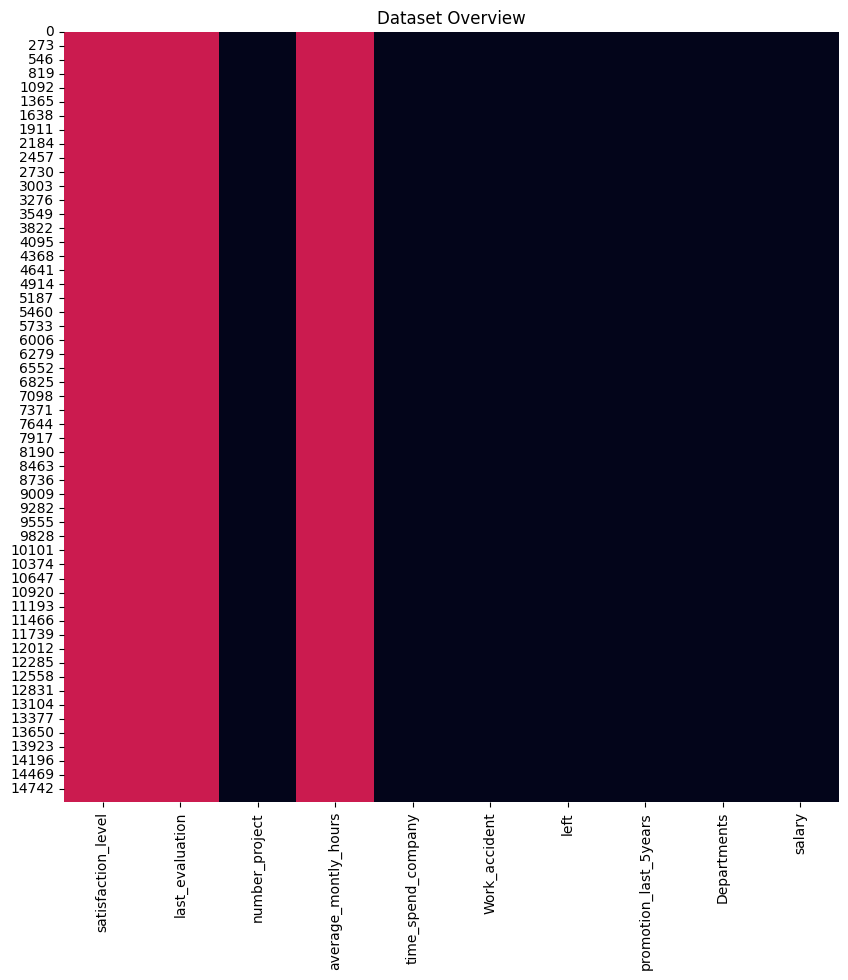

 Categerocial   Numerical/DateTime   NaN 


In [41]:
#Using function to find nans and num and catergorical variables in df
%load_ext autoreload
from functions import dtf_overview
%autoreload 2
dtf_overview(df, figsize=(10,10))

array([[<AxesSubplot: title={'center': 'satisfaction_level'}>,
        <AxesSubplot: title={'center': 'last_evaluation'}>,
        <AxesSubplot: title={'center': 'number_project'}>],
       [<AxesSubplot: title={'center': 'average_montly_hours'}>,
        <AxesSubplot: title={'center': 'time_spend_company'}>,
        <AxesSubplot: title={'center': 'Work_accident'}>],
       [<AxesSubplot: title={'center': 'left'}>,
        <AxesSubplot: title={'center': 'promotion_last_5years'}>,
        <AxesSubplot: >]], dtype=object)

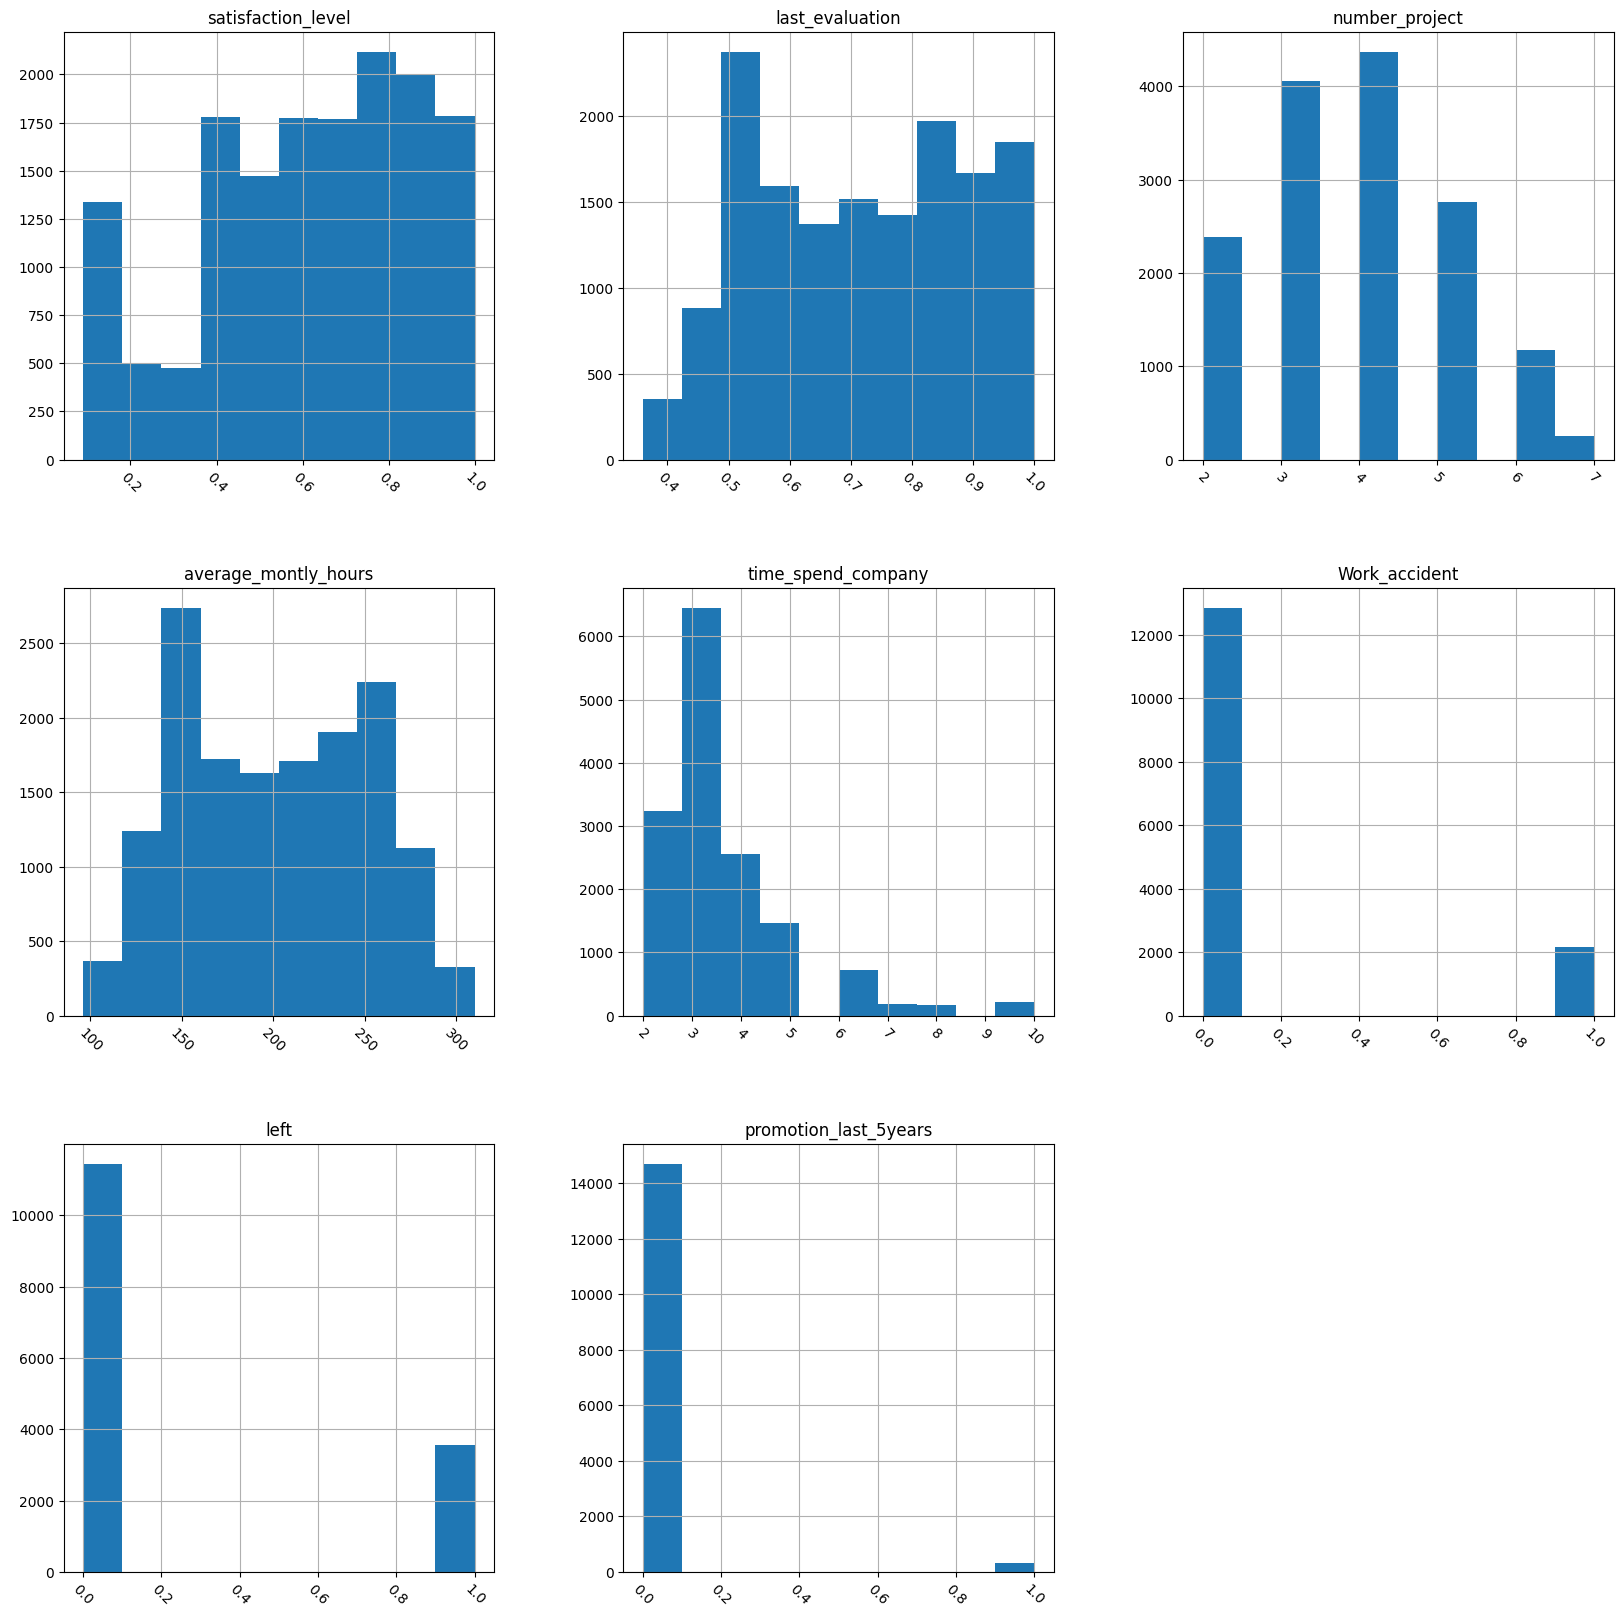

In [42]:
#Make histogram
df.hist(figsize=(20,20), xrot=-45)

NB! Here are a few things to look out for in a histogram:
- Distributions that are unexpected
- Potential outliers that don’t make sense
- Features that should be binary (i.e. “wannabe indicator variables”)
- Boundaries that don’t make sense
- Potential measurement errors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


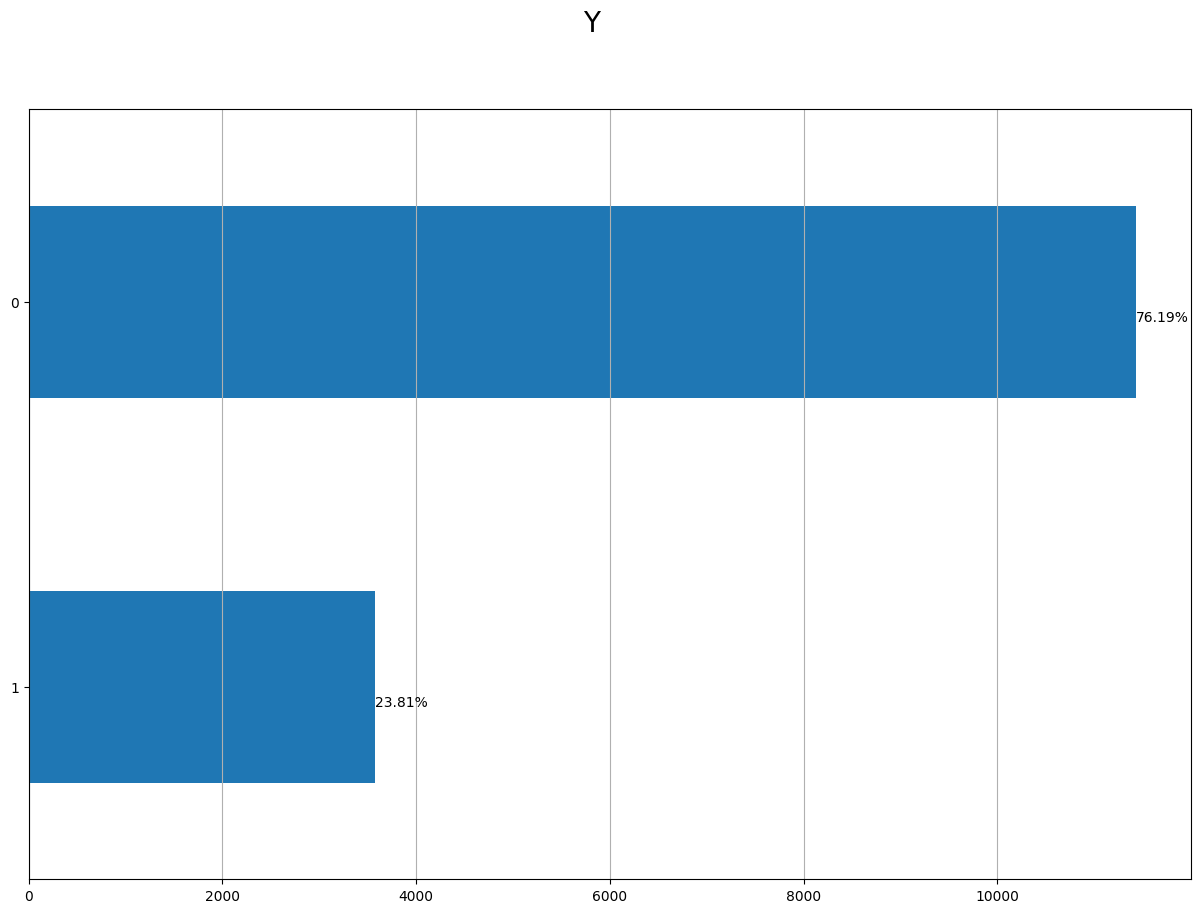

In [43]:
#Get the distribution of left

#Rename "left" variable to Y
df = df.rename(columns={"left":"Y"})

#Plot Y
%load_ext autoreload
from functions import freqdist_plot
%autoreload 2
freqdist_plot(dtf = df, x = "Y", box_logscale=True, figsize=(15,10), quantile_breaks=(0,10))

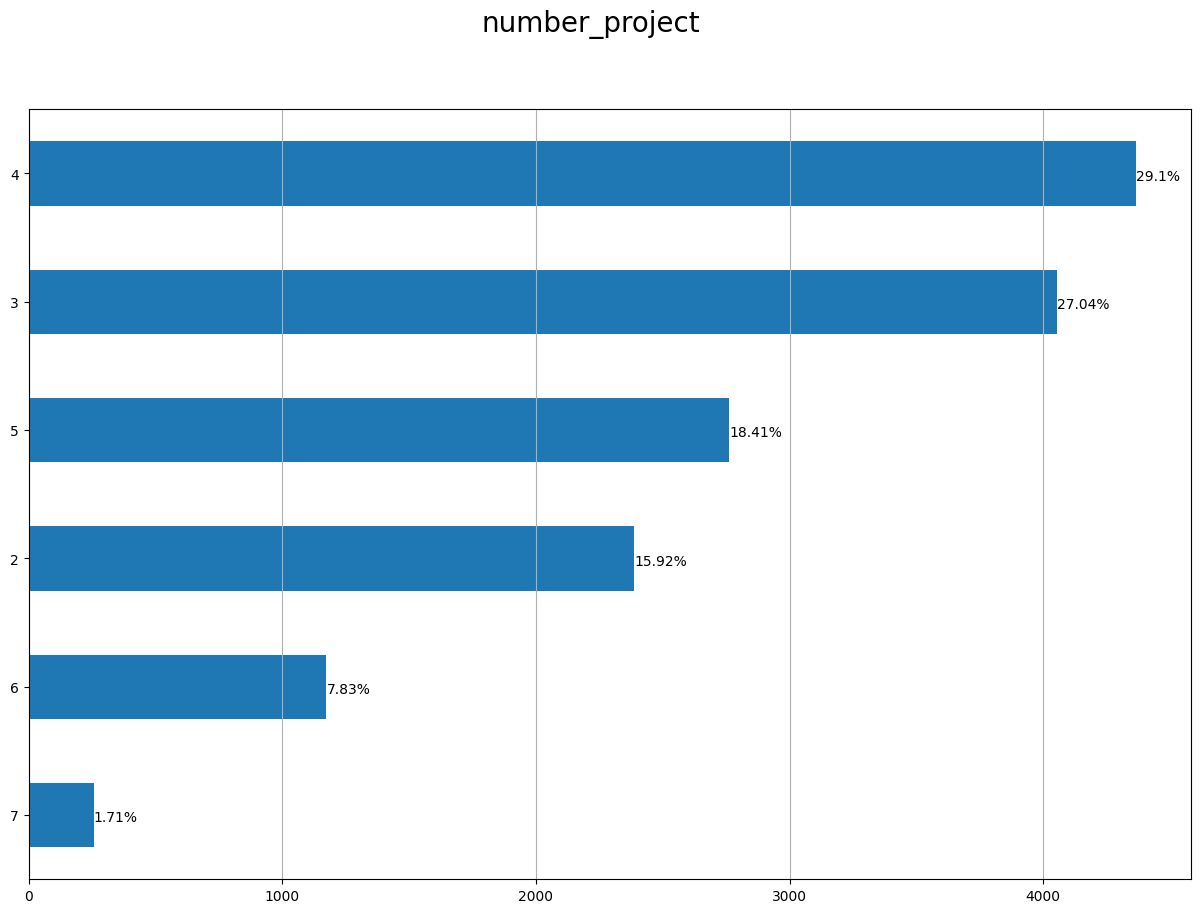

In [44]:
#Plotting categorical variables
freqdist_plot(df, "number_project", figsize=(15,10))

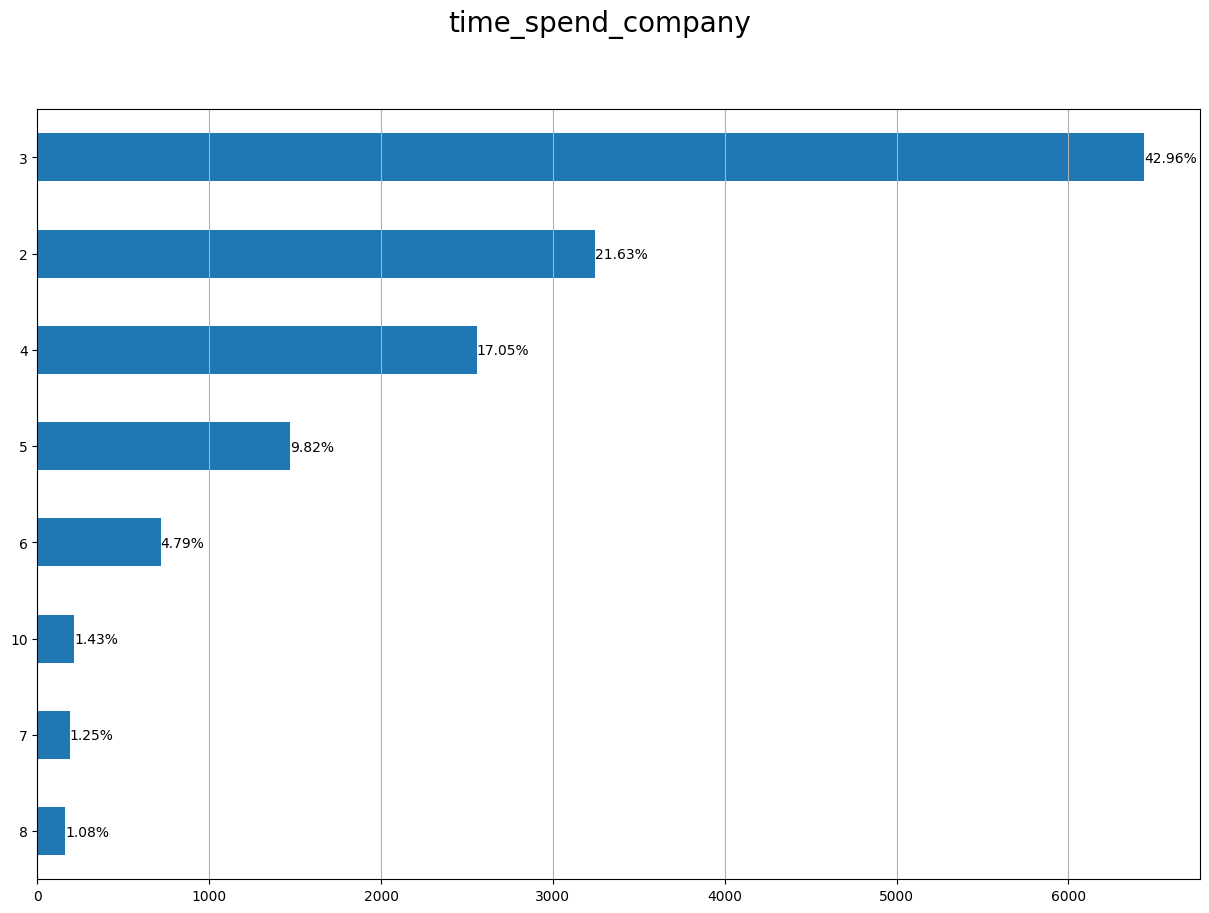

In [45]:
#Plotting categorical variables
freqdist_plot(df, "time_spend_company", figsize=(15,10))

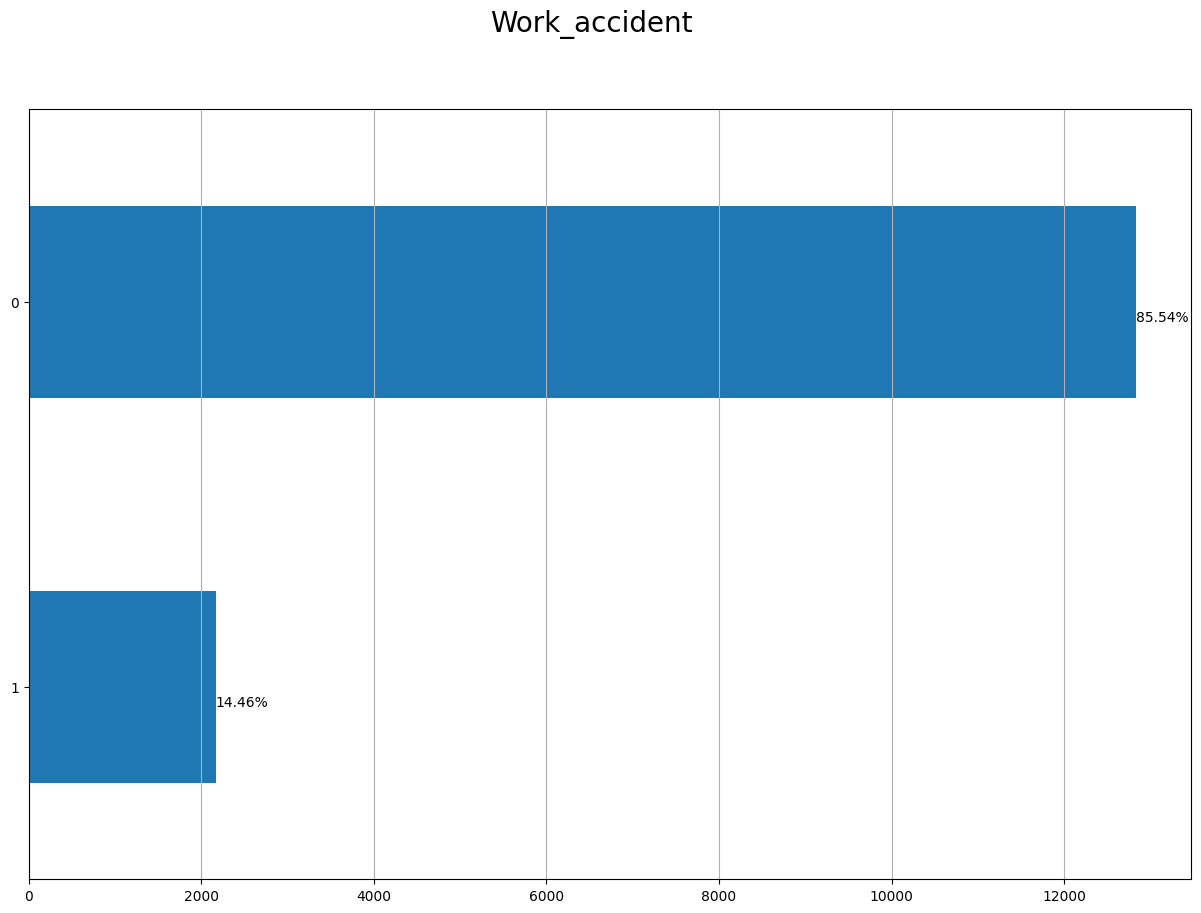

In [46]:
#Plotting categorical variables
freqdist_plot(df, "Work_accident", figsize=(15,10))

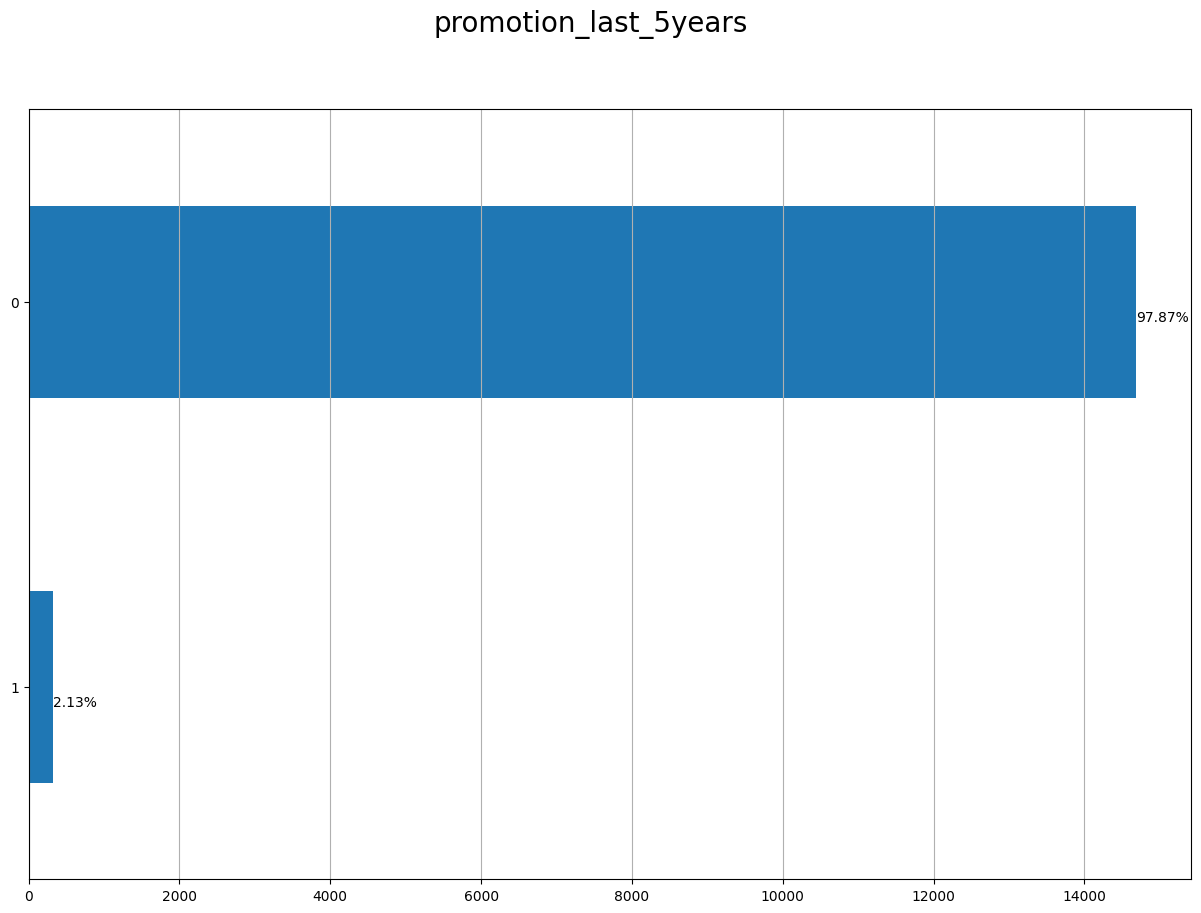

In [47]:
#Plotting categorical variables
freqdist_plot(df, "promotion_last_5years", figsize=(15,10))

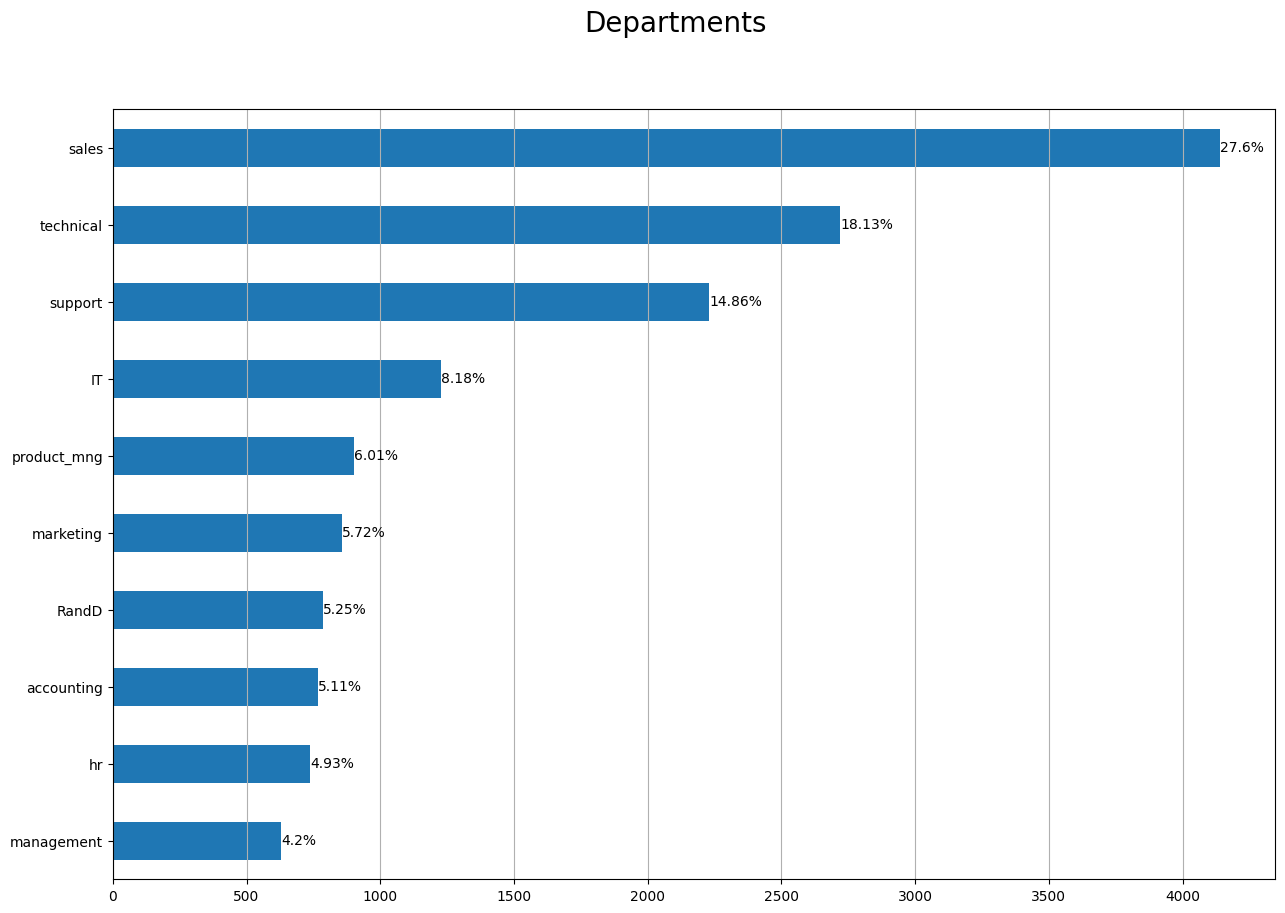

In [48]:
#Plotting categorical variables
freqdist_plot(df, "Departments", figsize=(15,10))

<AxesSubplot: >

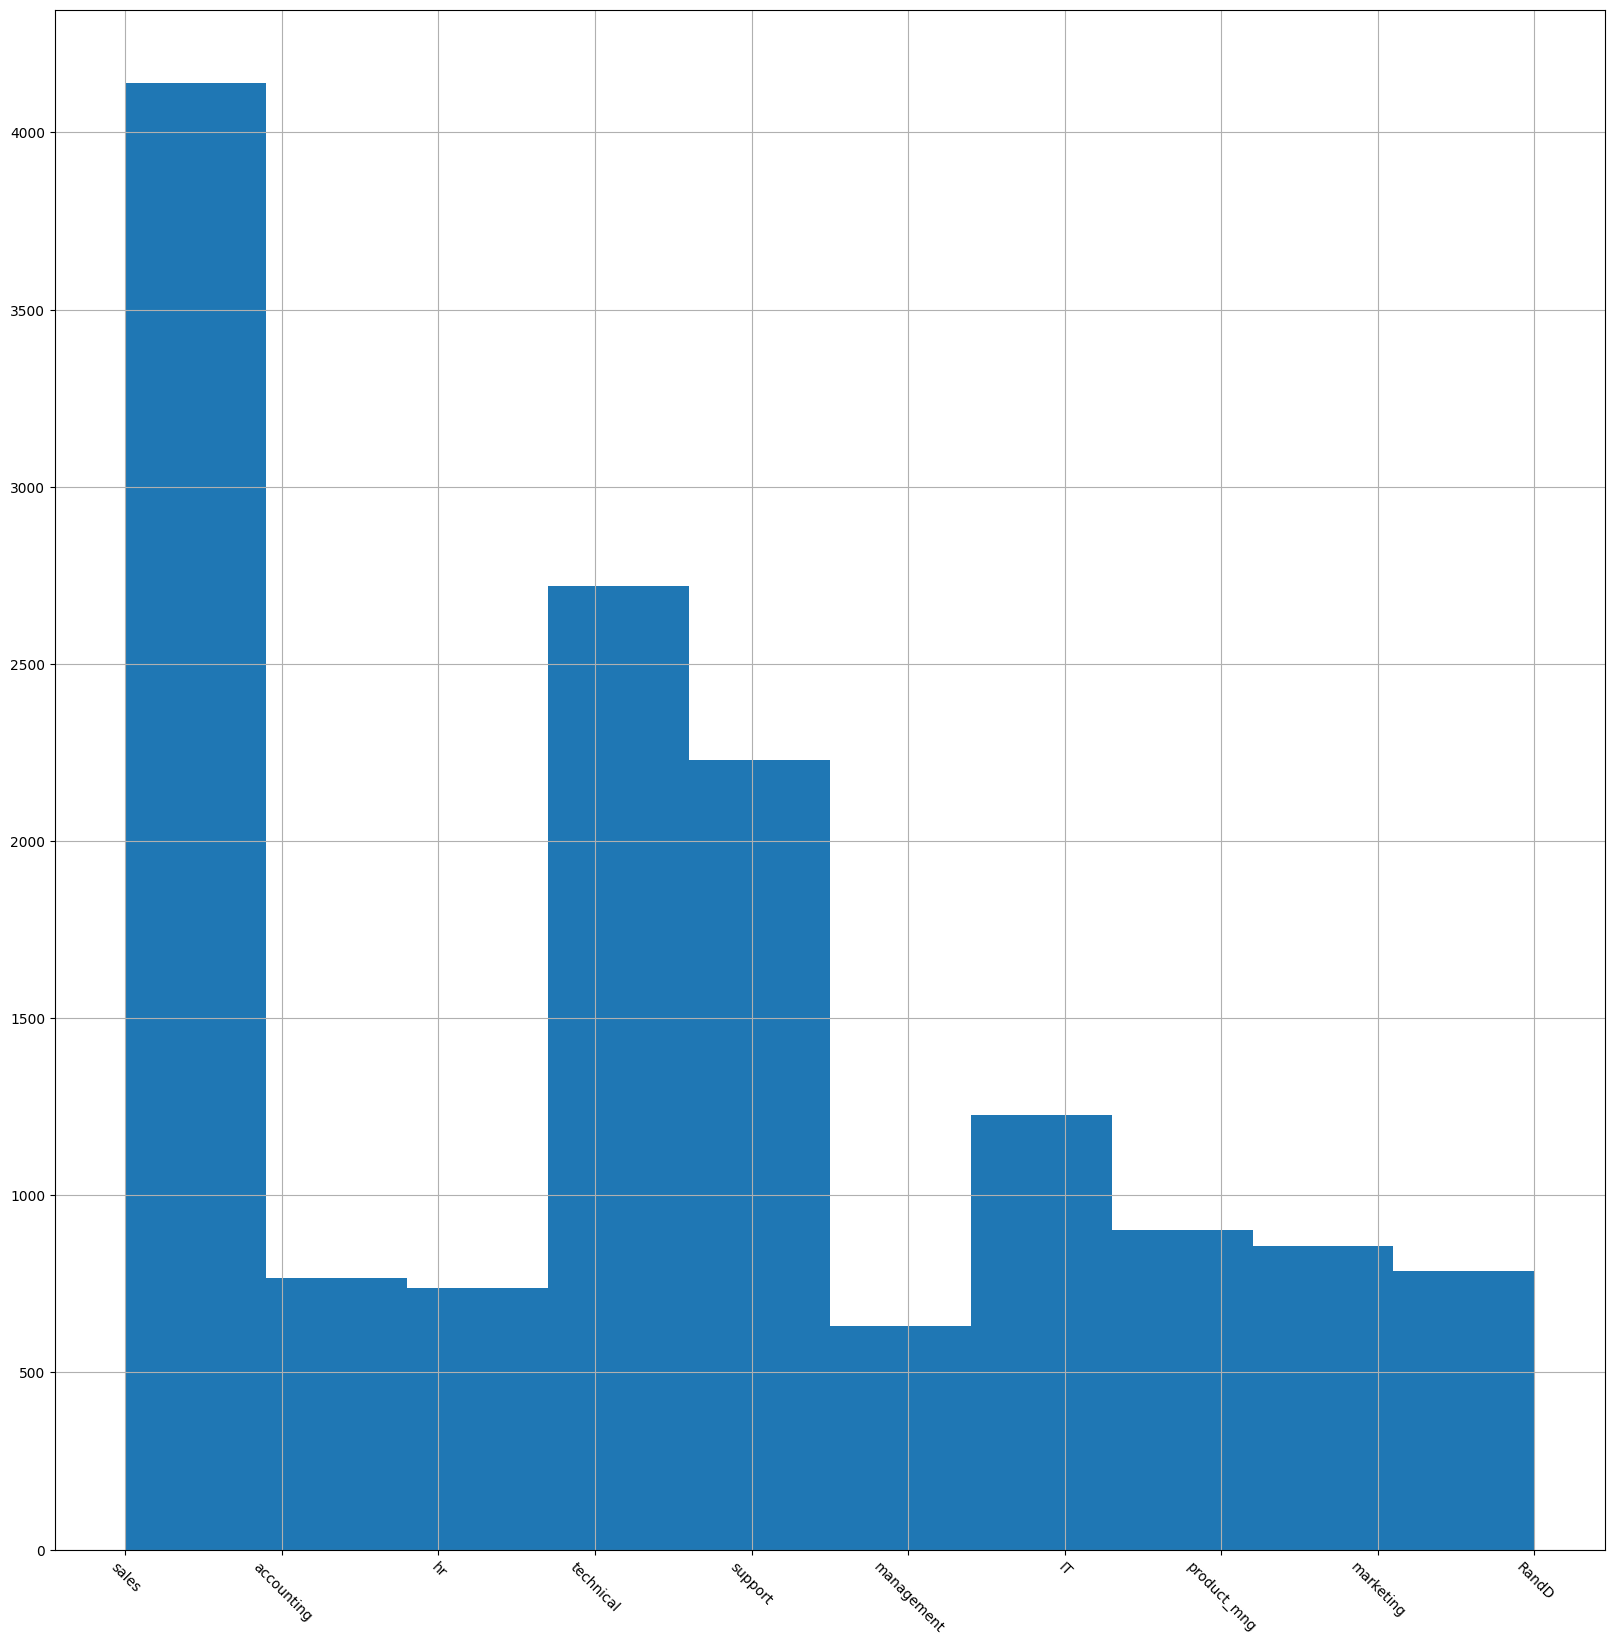

In [49]:
#Create hist of Dep
df["Departments"].hist(figsize=(20,20), xrot=-45)

NB! Here are some things to look out for when looking at categorical variabels:
       - Sparse classes. Can potentially cause the model to overfit. Should be combined if possible in Feature Engineering process.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- WARNING: Factorizing 10 labels of Departments ---
--- WARNING: Factorizing 3 labels of salary ---


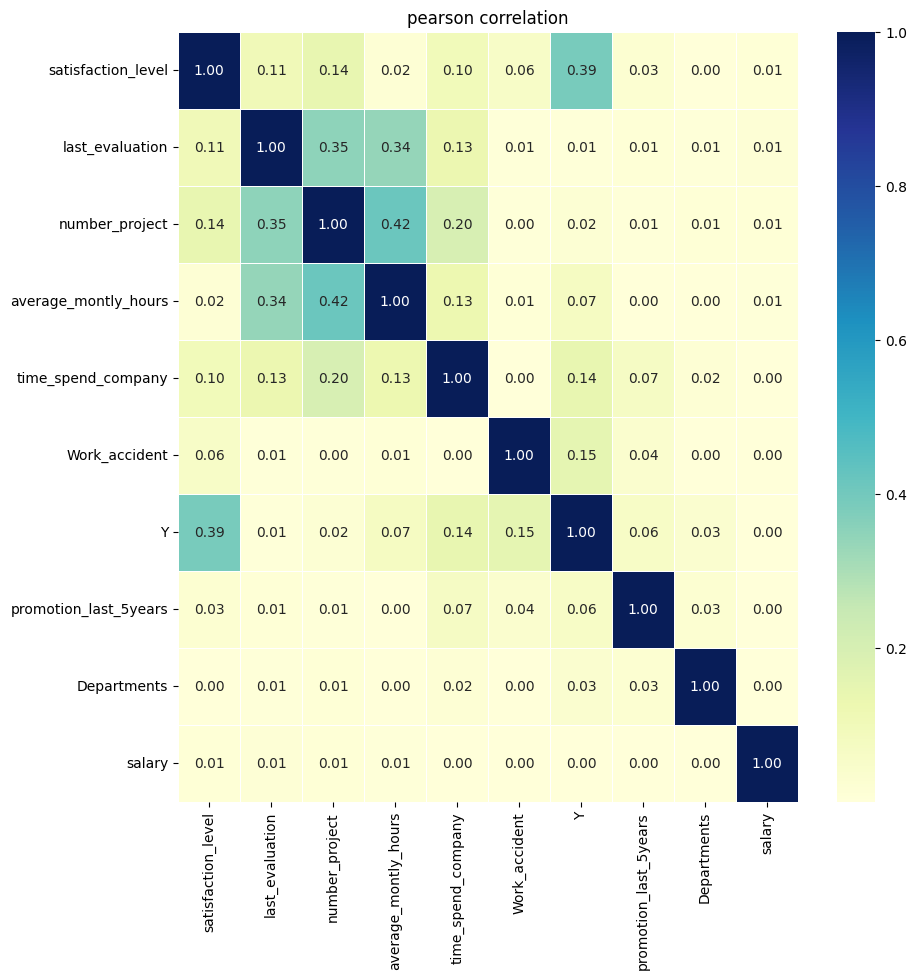

In [50]:
#Finding correlation with num var and Y
%load_ext autoreload
from functions import corr_matrix
%autoreload 2
corr = corr_matrix(df, method="pearson", negative=False, figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


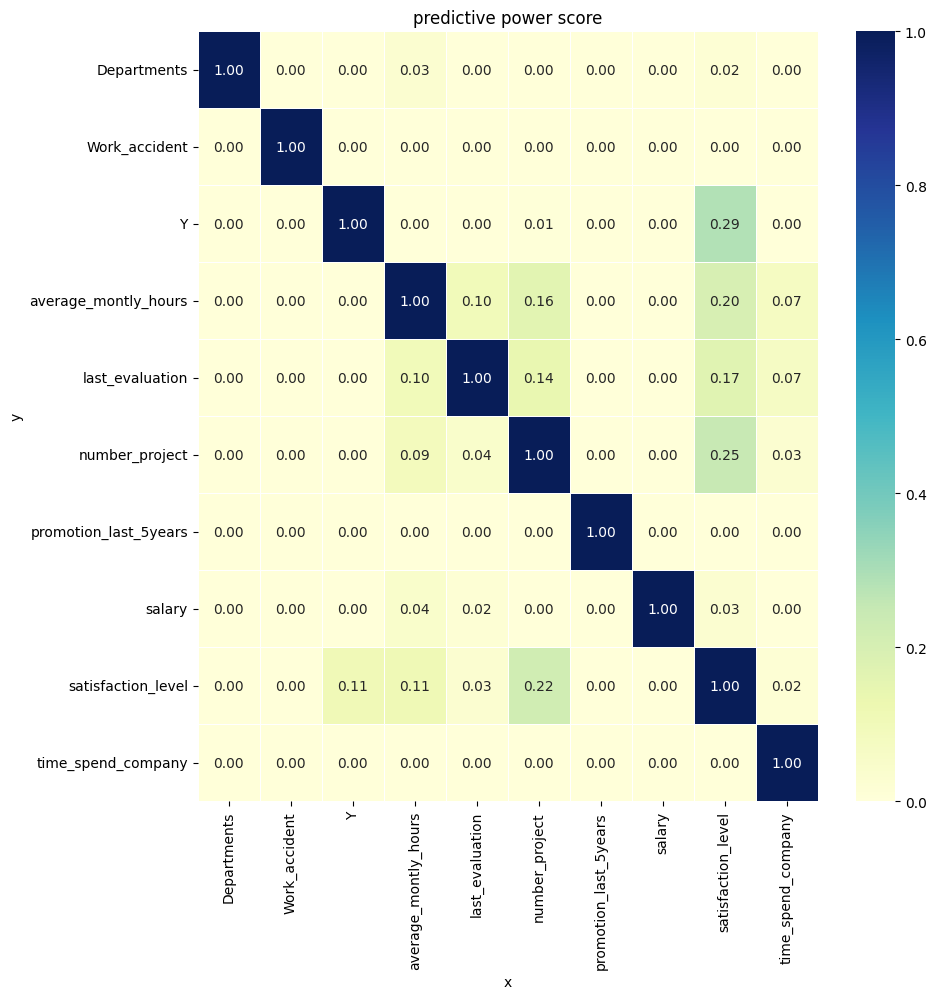

In [51]:
#Finding predictiv score between num and Y
%load_ext autoreload
from functions import pps_matrix
%autoreload 2
pps = pps_matrix(dtf = df, figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\jg\code\templat_reg_and_class\code\functions.py:196: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
C:\Users\jg\code\templat_reg_and_class\code\functions.py:196: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf[dtf[

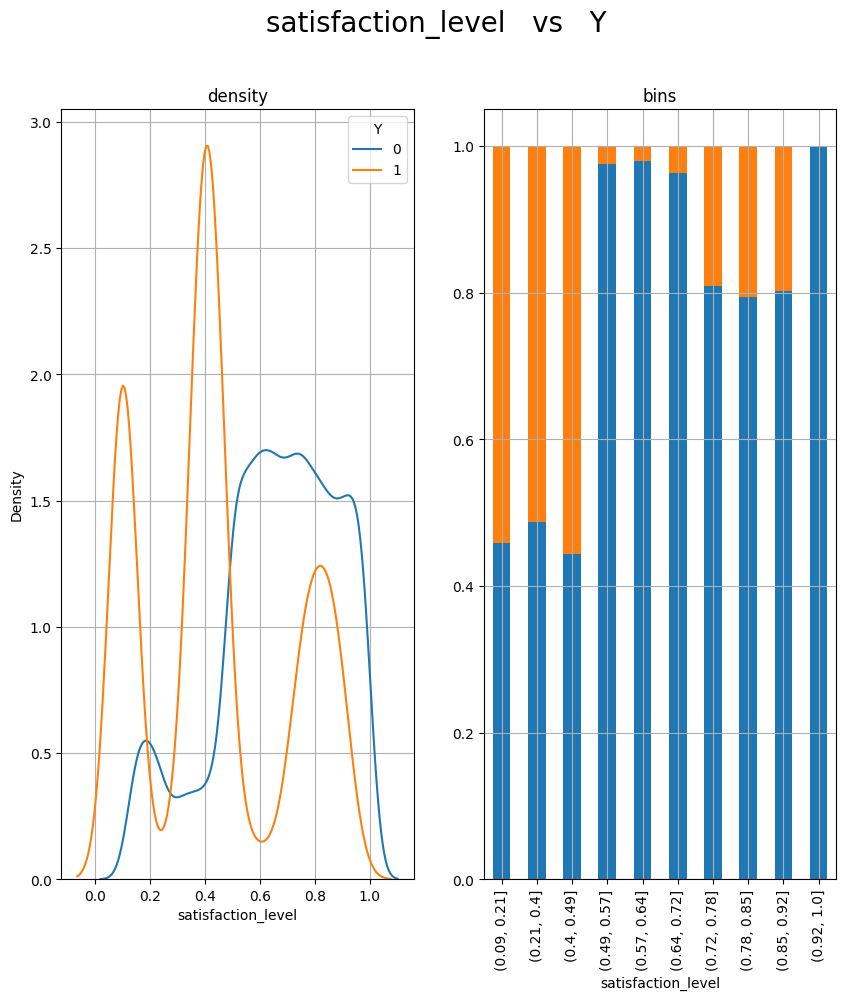

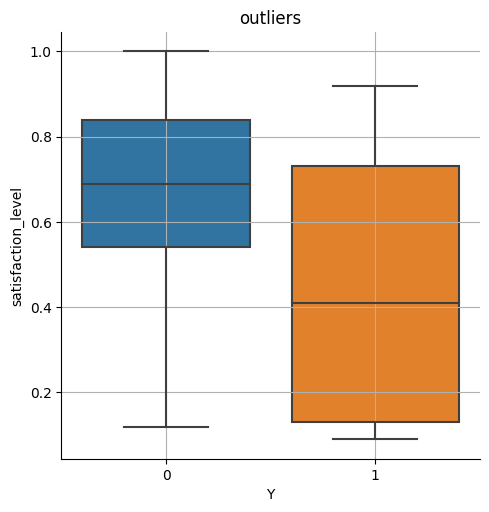

In [53]:
#Analysing highest corr with Y - satisfaction_level
%load_ext autoreload
from functions import bivariate_plot
%autoreload 2
bivariate_plot(df, x="satisfaction_level", y="Y", figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- got error ---
Series.rename() got an unexpected keyword argument 'columns'


C:\Users\jg\code\templat_reg_and_class\venv\lib\site-packages\seaborn\categorical.py:3021: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


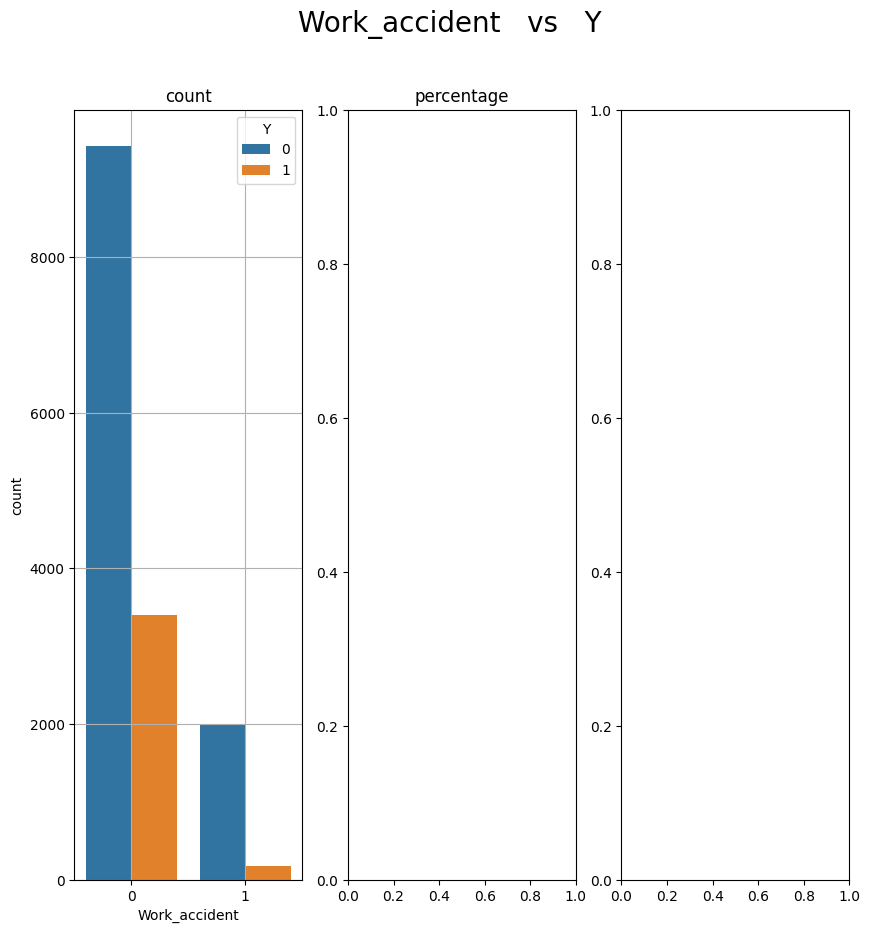

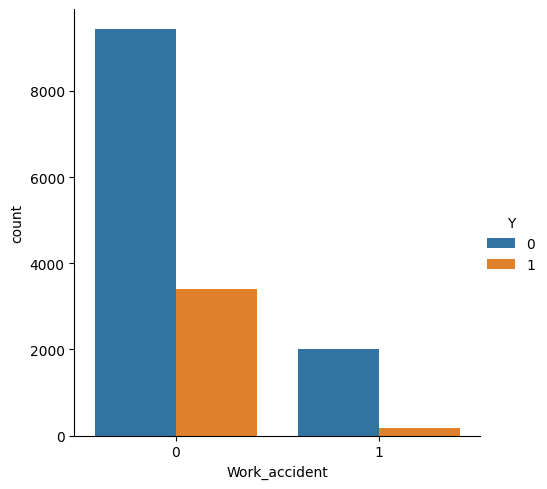

In [74]:
#Analysing highest corr with Y - satisfaction_level
%load_ext autoreload
from functions import bivariate_plot
%autoreload 2
bivariate_plot(df, x="Work_accident", y="Y", figsize=(10,10))